In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

### Steps in Regression
- Dataset creation and train & test splitting
- Guess a line
- Measure how wrong is the line
- See how wrong it is.
- Correct it slightly
- Rinse and Repeat


## Making regression dataset
- Making Dataset for simple linear regression
- sample size 250. 1 Feature to train on


In [2]:
# linear regression dataset
X, y = make_regression(
    n_samples=500,
    n_features=1,
    noise=50,
    bias=5,
    random_state=14,
)
X.shape, y.shape

((500, 1), (500,))

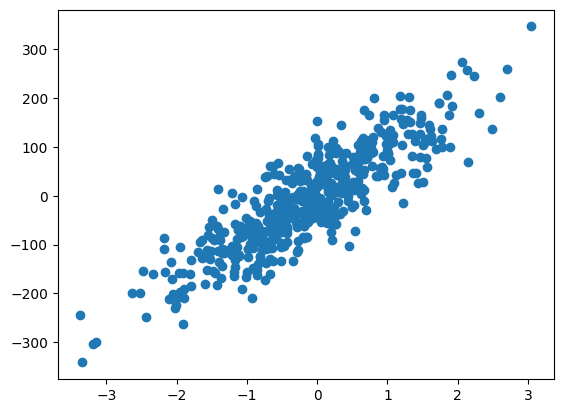

In [3]:
plt.scatter(X, y)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=14,
    test_size=0.20,
)

------

### Using Scikit-Learn

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

model.coef_, model.intercept_

y_pred = model.predict(x_test)

In [6]:
model.coef_, model.intercept_

(array([87.00886561]), np.float64(4.8298600963515455))

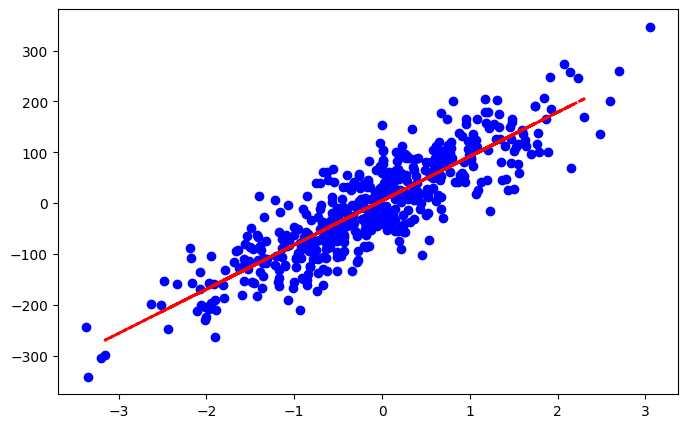

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(X, y, color="blue", label="data")
ax.plot(
    x_test,
    y_pred,
    color="red",
    label="prediction",
    linestyle="--",
    linewidth=2,
)

### Also applying standard scaler

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
y_scaled = scaler.transform(y.reshape(-1, 1))

x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(
    x_scaled,
    y_scaled,
    random_state=14,
    test_size=0.20,
)



In [9]:
model2 = LinearRegression()
model2.fit(x_scaled_train, y_scaled_train)
y_pred_scaled = model2.predict(x_scaled_test)

In [10]:
model2.coef_, model2.intercept_

(array([[87.00886561]]), array([-7.01263978]))

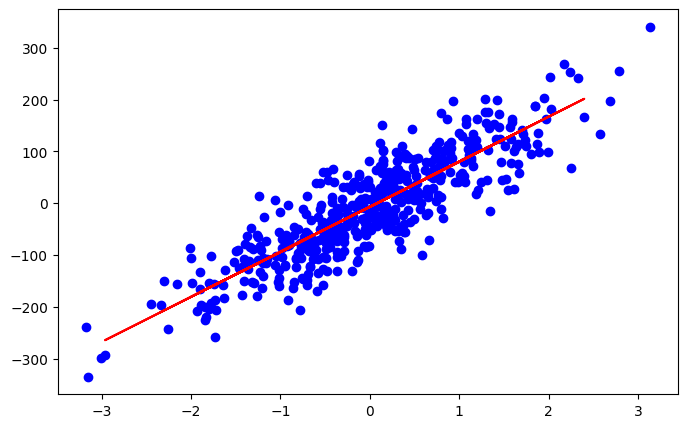

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(x_scaled, y_scaled, color="blue", label="data")
ax.plot(
    x_scaled_test,
    y_pred_scaled,
    color="red",
    label="prediction",
    # linestyle="--",
    # linewidth=2,
)

# not able to understand why scaled data is not giving good results

-----

### Using Covariance and Variance

- Calculate Covariance
- Calculate Variance


### Covariance

Indicates the direction of the linear relationship between X and Y. Positive covariance means they move together; negative means opposite.

$$
Cov(x, y) = \frac{\sum(x_{i} - \overline{x})(y_{i} - \overline{y})}{n -1}
$$

<center>OR</center>

$$
Cov(x, y) = \frac{1}{{n-1}}{\sum(x_{i} - \overline{x})(y_{i} - \overline{y})}
$$

-   $x_{i}$ x at i
-   $\overline{x}$ mean of x
-   $y_{i}$ x at i
-   $\overline{y}$ mean of x


### Variance
Measures how spread out the X values are from their mean.

$$
Var(x) = \frac{\sum(x_{i} - \overline{x})^{2}}{n-1} \\
$$

<center>OR</center>

$$
Var(x) = \frac{1}{{n-1}}{\sum(x_{i} - \overline{x})^{2}}
$$


-   $x_{i}$ x at i
-   $\overline{x}$ mean of x

### Slop using Covariance and Variance
**Slope $b_{1}$**: Represents the change in $Y$ for a one-unit change in $X$. It's the ratio of their shared movement (covariance) to $X$'s own spread (variance).

**Intercept ${b_{0}}$**: The calculation for the intercept relies on a fundamental property of the Ordinary Least Squares line: it always passes exactly through the mean of the $X$ values and the mean of the $Y$ values $(\overline{x}, \overline{y})$.

#### Why This Works (Intuition)
1. Covariance (Numerator): Captures how much X and Y change together.
2. Variance (Denominator): Standardizes this by X's own fluctuation.
3. The Ratio: Tells you how much Y changes relative to X's changes, giving you the slope.

$$
b_{1}=\frac{\sum (x_{i}-\overline{x})(y_{i}-\overline{y})}{\sum (x_{i}-\overline{x})^{2}}=\frac{Cov(X,Y)}{Var(X)}
$$

### Info (First it was not fitting correctly)

- basically when np.array is shape (n, 1) something like this
- and we perform array \* array numpy treats like matrix multiplication not vector dot product.
- to fix this issue, convert array with shape (n, 1) to 1D array using flatten, ravel
- Mental note; Linear Regression math expects vector not matrices.


In [12]:
x_mean = np.mean(x_train.ravel())
y_mean = np.mean(y_train.ravel())
n = len(x_train)

covariance = np.sum((x_train.ravel() - x_mean) * (y_train.ravel() - y_mean)) / n - 1
variance = np.sum((x_train.ravel() - x_mean) ** 2)

print(covariance, variance)

87.34085635490003 406.123471366992


In [13]:
slope = np.sum((x_train.ravel() - x_mean) * (y_train.ravel() - y_mean)) / np.sum(
    (x_train.ravel() - x_mean) ** 2
)
# y = mx + c
# c = y - mx
intercept = y_mean - (x_mean * slope)
slope, intercept

(np.float64(87.00886561177956), np.float64(4.829860096351549))

In [14]:
y_pred = (slope * x_test.ravel()) + intercept

In [15]:
np.polyfit(x_train.flatten(), y_train, 1)

array([87.00886561,  4.8298601 ])

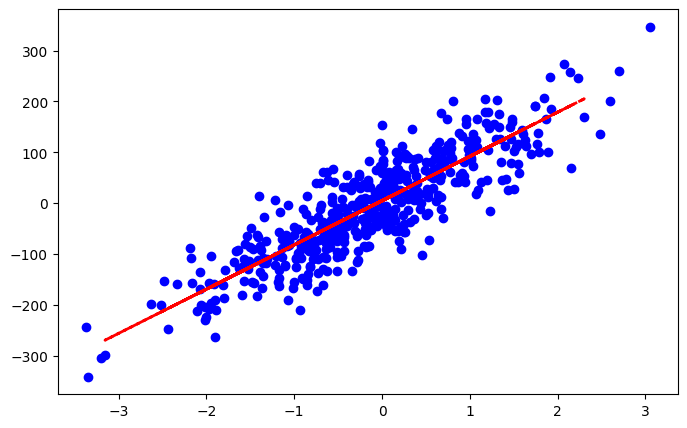

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(X, y, color="blue", label="data")
ax.plot(
    x_test,
    y_pred,
    color="red",
    label="prediction",
    linestyle="--",
    linewidth=2,
)

--------

## OLS (Ordinary Least Square)

- Estimator used in linear regression.

### Formula

$$\^{\beta }=(\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$$

1. #### $\beta$ - estimated coefficients

- Vector of estimated slope and intercept
- Example
  $$
      \hat\beta = \begin{bmatrix} \hat\beta{}_0 \\ \hat\beta{}_1 \\ \vdots \\ \hat\beta{}_n \end{bmatrix}
  $$

---

2.  #### X - Design Matrix (inputs)

- Contains the observed data
- Size $n * p$
  - $n$: number of observations
  - $p$: number of params
- Example
  $$
  X =
  \begin{bmatrix}
  x_{11} & x_{12} & \dots & x_{1p} \\
  x_{21} & x_{22} & \dots & x_{2p} \\
  \vdots & \vdots & \ddots & \vdots \\
  x_{n1} & x_{n2} & \dots & x_{np}
  \end{bmatrix}
  $$



-----
3. #### y - response vector
- observed output values
- size $n * 1$
- Example
    $$
    y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}
    $$

-----

4. #### $X^T$ - Transpose of $X$
- Switches rows and columns
- size: $p * n$


----

5. #### $(X^TX)^{-1}$ matrix inverse
- $X^TX$ is a $p*p$ matrix
- Its inverse exists only if columns of $X$ are linearly independent (no perfect multicollinearity).

In [ ]:
x_train_new = np.c_[np.ones(len(x_train)), x_train] # adding 1 for intercept
x_t = x_train_new.T
x_inv = np.linalg.inv(x_t @ x_train_new)
betas = x_inv @ x_t @ y_train

In [28]:
y_pred = betas[1] * x_test + betas[0]

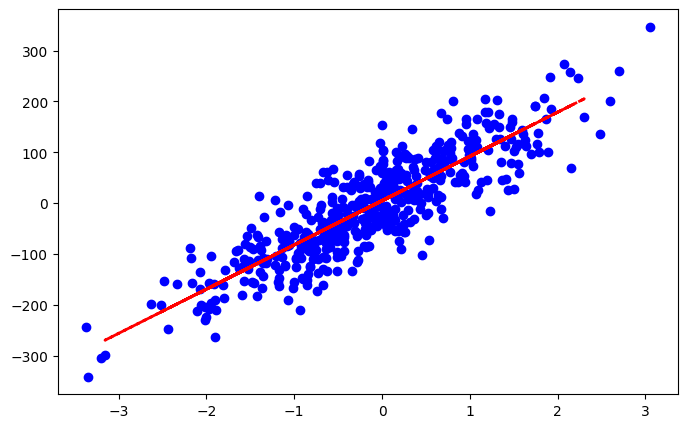

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(X, y, color="blue", label="data")
ax.plot(
    x_test,
    y_pred,
    color="red",
    label="prediction",
    linestyle="--",
    linewidth=2,
)

### Mathematical Intuition

- What are trying to compute?  
  $ X @ \beta \approx Y$

- Why approx? means estimating $y$ there will be error because data may contain noise
  so we calculate error  
  $error = X\beta - y$

- Key Idea: The error is orthogonal (perpendicular) to the all columns of $X$.  
  The leftover error has no direction that aligns with our input features.

- Two vector perpendicular dot product is 0
  $$
  X^T (X\beta - y) = 0
  $$

- Solving step by step
 - Expanding
$X^TX\beta - X^Ty = 0$
 - Moving Terms
$X^TX\beta = X^Ty$
 - Isolate `beta` $\beta = (X^TX)^{-1}X^Ty$

### Let's connect with code

Step 1: Transpose

- `x_t = x_train.T`

```python
x_train =
[
 [x11, x12],   # sample 1
 [x21, x22],   # sample 2
 [x31, x32]    # sample 3
]
```

```python
x_t =
[
 [x11, x21, x31],   # feature 1 across all samples
 [x12, x22, x32]    # feature 2 across all samples
]
```


-------

### Guess Line
- Initialize random weights
- predict

In [ ]:
def init():
    m = np.random.rand()
    c = np.random.rand()
    return m, c

In [ ]:
def predict_raw(X, m, c):
    y_pred = []
    for x in X:
        y_hat = (x * m) + c
        y_pred.append(y_hat)

    return np.array(y_pred)

In [30]:
def predict(X, m, c):
    y_pred = np.dot(X, m) + c
    return y_pred

### Calculate Root Mean Square Error
- Calculate squared error for each prediction
- mean and then square root

In [ ]:
def root_mean_squared_error_raw(y_pred, y):
    residuals = []
    for y_hat, y_og in zip(y_pred, y):
        residual = y_hat - y_og
        residuals.append(residual)

    mean = sum(residuals) / len(residuals)
    return mean ** (1 / 2)

In [ ]:
def root_mean_squared_error(y_pred, y):
    residual = (y_pred - y) ** 2
    mean = np.mean(residual)
    return np.sqrt(mean)

### Error Correction
- perform gradient decent
- 

### Runner Code
- 